In [67]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

## Loading data

In [68]:
#reading thr file
pd.read_csv("houses.csv")

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [69]:
houses = pd.read_csv("houses.csv")

In [70]:
houses.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [71]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

**Data cleansing process**

In [72]:
#checking for the sum of null values
houses.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [73]:
#checking for the sum of duplicated values
houses.duplicated().sum()

0

**just to have an idea of how the features look like**

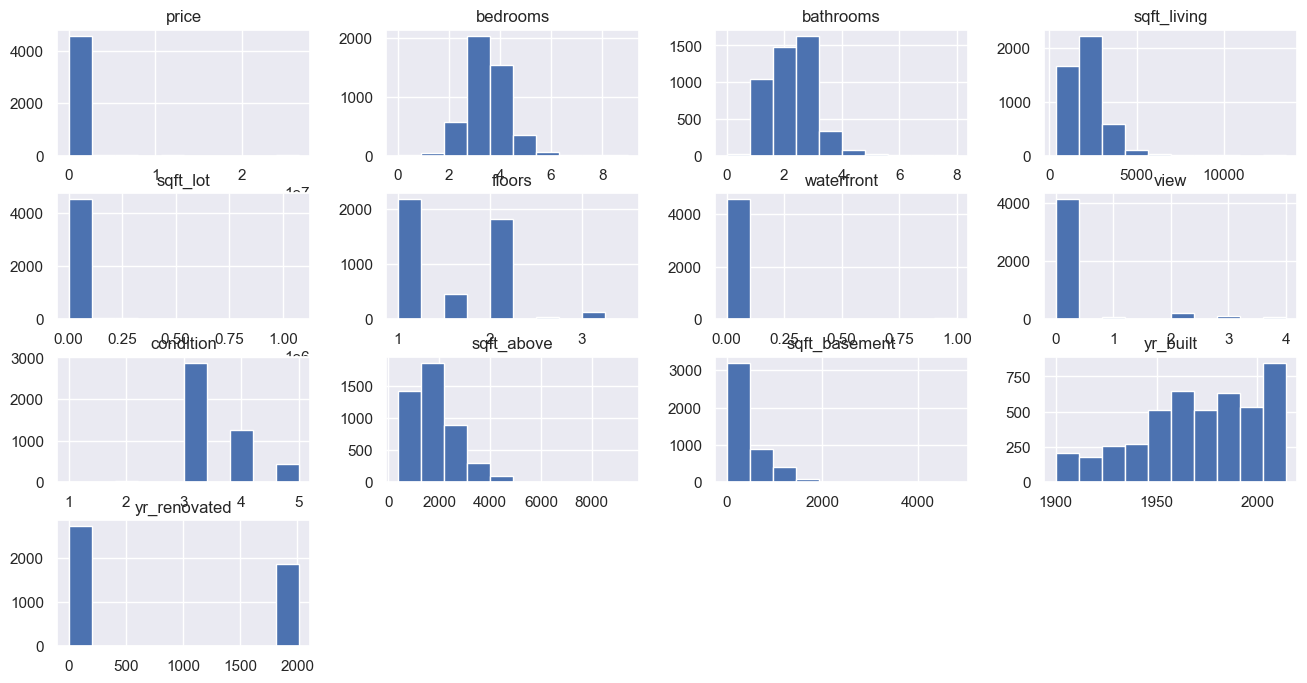

In [74]:
houses.hist(figsize=(16,8),bins=10)
plt.show()

In [75]:
#calculating some statistical data
houses.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


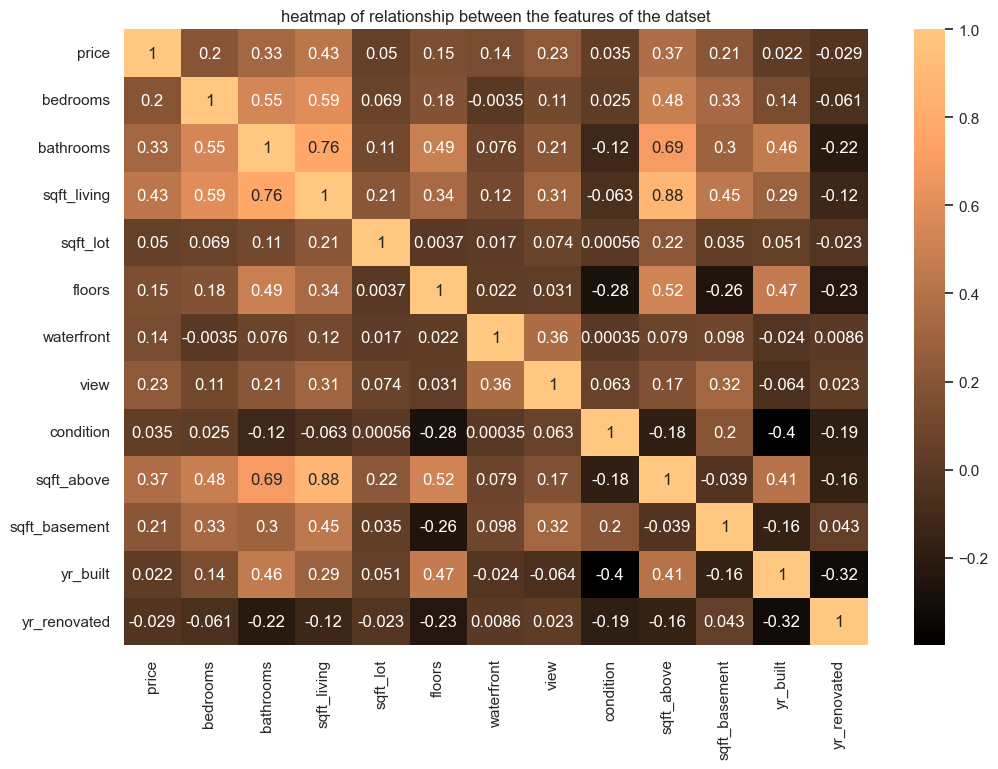

In [84]:
# no visualizing the relationship between the price and other features

plt.figure(figsize=(12,8))
sns.heatmap(houses.corr(), cmap=plt.cm.copper,annot=True)
plt.title('heatmap of relationship between the features of the datset', fontsize = 12)
plt.show()

In [77]:
#Linear Regression model without categorical columns

X = houses[['bedrooms','bathrooms','sqft_living','sqft_lot','sqft_above','floors','waterfront','view','condition','sqft_basement','yr_built','yr_renovated',]]
y = houses['price']



In [78]:
# split my data into training and testing data
X_train, X_test,Y_train, Y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [79]:
# initialize the LinearRegression model
model = LinearRegression()

In [80]:
# I fit the model with the training data
model.fit(X_train,Y_train)

LinearRegression()

In [82]:
#estimate the coefficients for the linear regression problem
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

                 Coefficient
bedrooms       -53506.364232
bathrooms       59343.926043
sqft_living       161.776161
sqft_lot           -0.656937
sqft_above         97.401416
floors          32051.116386
waterfront     588167.665394
view            35419.755328
condition       35754.102365
sqft_basement      64.374746
yr_built        -2196.522740
yr_renovated        8.224363


In [65]:
# I make prediction with the fitted model
linear_pred = model.predict(X_test)

In [66]:
# score the model on the train set
print('Train score before feature selection: {}\n'.format(model.score(X_train,Y_train)))
# score the model on the test set
print('Test score before feature selection: {}\n'.format(model.score(X_test,Y_test)))
# calculate the overall accuracy of the model
print('Overall model accuracy before feature selection: {}\n'.format(r2_score(Y_test,linear_pred)))
# compute the mean squared error of the model
print('Mean Squared Error before feature selection: {}'.format(mean_squared_error(Y_test,linear_pred)))


Train score before feature selection: 0.19597756216049578

Test score before feature selection: 0.46017953058421324

Overall model accuracy before feature selection: 0.46017953058421324

Mean Squared Error before feature selection: 65832396764.36289


## the accuracy before feature selection is really low so I have to maybe check for multicolinearity? then retrain, retest and see accuracy after feature selection

In [ ]:
#gotta check for multicollinearity using the variance inflation factor.

In [ ]:
#drop the columns that highly correlate with each other